# The SphericalVoronoi Algorithm step by step

In [1]:
import numpy as np
from scipy.spatial import ConvexHull
from mpl_toolkits.mplot3d import proj3d
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import helpers
%matplotlib inline

## Plot generator points

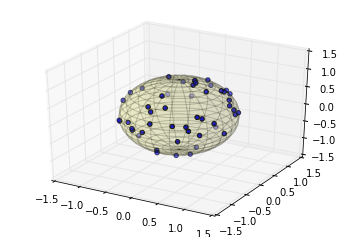

In [2]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
helpers.add_sphere(ax)
points = helpers.generate_random_array_spherical_generators(50, 1, np.random.RandomState(117))
ax.scatter(points[:,0], points[:,1], points[:,2], color='k')

## Triangulate generator points and add center of sphere

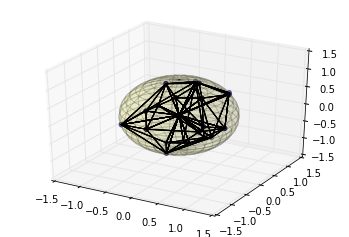

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
helpers.add_sphere(ax)
points = helpers.generate_random_array_spherical_generators(20, 1, np.random.RandomState(117))
points = np.insert(points, 0, np.array([0,0,0]), axis=0)
tri = ConvexHull(points)
tetrahedrons = points[tri.simplices]
tetrahedrons = np.insert(tetrahedrons, 3, np.array([0,0,0]), axis=1)
for simplex in tetrahedrons:
    helpers.plot_simplex(simplex, ax)
ax.scatter(points[:,0], points[:,1], points[:,2], color='k')

## For each tetrahedron...

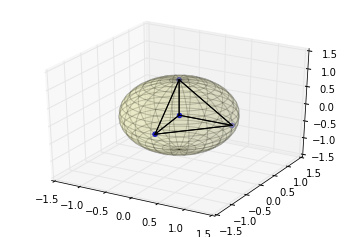

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
helpers.add_sphere(ax)
points = np.array([[1,0,0], [0.1, -0.8, 0], [0, 0, 1]])
points = np.array([p / np.linalg.norm(p) for p in points])
ax.scatter(points[:,0], points[:,1], points[:,2], color='b')
ax.scatter([0], [0], [0], color='b')
points = np.insert(points, 0, np.array([0,0,0]), axis=0)
helpers.plot_simplex(points, ax)   

## ... calculate the circumcenter of the circumsphere

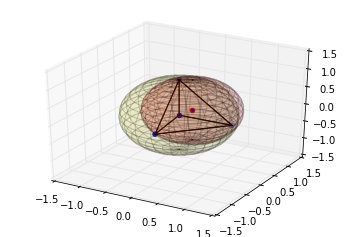

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
helpers.add_sphere(ax)
points = np.array([[1,0,0], [0.1, -0.8, 0], [0, 0, 1]])
points = np.array([p / np.linalg.norm(p) for p in points])
ax.scatter(points[:,0], points[:,1], points[:,2], color='b')
ax.scatter([0], [0], [0], color='b')
points = np.insert(points, 0, np.array([0,0,0]), axis=0)
helpers.plot_simplex(points, ax)
circum_center = helpers.calc_circumcenters(np.array([points]))
ax.scatter(circum_center[:,0], circum_center[:,1], circum_center[:,2], color='r')
helpers.add_sphere(ax, circum_center[0], np.linalg.norm(circum_center), 'r')

# Project circumcenter to the sphere

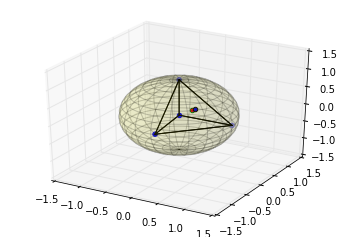

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
helpers.add_sphere(ax)
points = np.array([[1,0,0], [0.1, -0.8, 0], [0, 0, 1]])
points = np.array([p / np.linalg.norm(p) for p in points])
ax.scatter(points[:,0], points[:,1], points[:,2], color='b')
ax.scatter([0], [0], [0], color='b')
points = np.insert(points, 0, np.array([0,0,0]), axis=0)
helpers.plot_simplex(points, ax)
circum_center = helpers.calc_circumcenters(np.array([points]))
ax.scatter(circum_center[:,0], circum_center[:,1], circum_center[:,2], color='g')
vertex = helpers.project_to_sphere(circum_center, np.array([0,0,0]), 1)
ax.plot([vertex[0][0], circum_center[0][0]], [vertex[0][1], circum_center[0][1]], [vertex[0][2], circum_center[0][2]],
        lw=3, color="r")
ax.scatter(vertex[:,0],vertex[:,1],vertex[:,2], 'r')

## Obtain lots of (red) points on the sphere

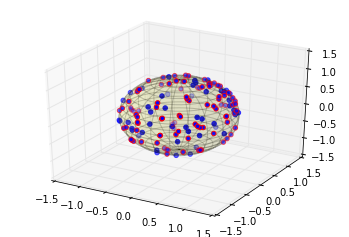

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
helpers.add_sphere(ax)
points = helpers.generate_random_array_spherical_generators(50, 1, np.random.RandomState(117))
from _spherical_voronoi import SphericalVoronoi
import scipy
sv = SphericalVoronoi(points)
ax.scatter(points[:,0], points[:,1], points[:,2], color='b')
ax.scatter(sv.vertices[:,0], sv.vertices[:,1], sv.vertices[:,2], color='r')

## These points are the Voronoi vertices

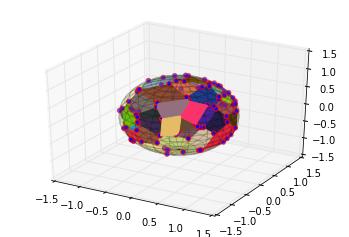

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
helpers.add_sphere(ax)
points = helpers.generate_random_array_spherical_generators(50, 1, np.random.RandomState(117))
from _spherical_voronoi import SphericalVoronoi
from matplotlib import colors
import scipy
sv = SphericalVoronoi(points)
sv.sort_vertices_of_regions()
ax.scatter(sv.vertices[:,0], sv.vertices[:,1], sv.vertices[:,2], color='r')
for n in range(0, len(sv.regions)):
    region = sv.regions[n]
    #ax.scatter(points[n, 0], points[n, 1], points[n, 2], c='b')
    random_color = colors.rgb2hex(scipy.rand(3))
    polygon = Poly3DCollection([sv.vertices[region]], alpha=1.0)
    polygon.set_color(random_color)
    ax.add_collection3d(polygon)